В цьому домашньому завданні ми з вами побудуємо повноцінне ML-рішення реальної ML-задачі. Ви вже маєте всі знання, які для цього потрібні. Дотримуйтесь інструкцій, та користуйтесь матеріалами лекцій, аби виконувати завдання. Тут інструкції будуть детальні, а в подільших завданнях - будуть ставати все менш детальними, аби ви вже починали самостійно структурувати ML-проєкт і до кінця курсу для вас розвʼязати будь-яку ML–задачу було eazy-breezy.

## Dataset

Будемо працювати з набором даних `cars.csv`, який описує автомобілі і їх ціну у індійських рупіях :) Мета - передбачити ціну авто за його характеристиками. Опис набору даних:

| Назва рядка            | Опис                                                                                                                                                 |
|------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------|
| Car_ID                 | Унікальний ідентифікатор для кожного оголошення про автомобіль.                                                                                         |
| Brand                  | Бренд або виробник автомобіля (наприклад, Toyota, Honda, Ford тощо).                                                                                     |
| Model                  | Модель автомобіля (наприклад, Camry, Civic, Mustang тощо).                                                                                               |
| Year                   | Рік виготовлення автомобіля.                                                                                                                            |
| Kilometers_Driven      | Загальний пробіг автомобіля у кілометрах.                                                                                                               |
| Fuel_Type              | Тип палива, який використовує автомобіль (наприклад, бензин, дизель, електро тощо).                                                                      |
| Transmission           | Тип трансмісії автомобіля (наприклад, механічна, автоматична).                                                                                           |
| Owner_Type             | Кількість попередніх власників автомобіля (наприклад, перший, другий, третій).                                                                           |
| Mileage                | Паливна ефективність автомобіля у кілометрах на літр.                                                                                                   |
| Engine                 | Об'єм двигуна автомобіля в кубічних сантиметрах (CC).                                                                                                   |
| Power                  | Максимальна потужність автомобіля в кінських силах (bhp).                                                                                               |
| Seats                  | Кількість місць в автомобілі.                                                                                                                           |
| Price                  | Вартість автомобіля в INR (індійські рупії), що є цільовою змінною для прогнозування.                                                                   |

# Імпорти

Для зручності рекомендую всі імпорти розмістити тут нагорі, аби коли ви перезавантажували ноутбук, одразу можна було в один запуск клітинки імпортувати всі потрібні бібліотеки.

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

# Знайомство з даними

**Завдання 1.** Завантажте набір даних `cars.csv` в pandas.DataFrame. Виведіть перші 5 записів.

In [3]:
df = pd.read_csv('cars.csv') # замініть на ваш шлях до файлу
df.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000


**Завдання 2.** Виведіть типи даних колонок даних, а також дослідіть, які по факту типи даних мають записи в кожній колонці (тип `object` може містити різні типи даних) і скільки значень є в кожній категоріальній колонці.

Напишіть висновок, скільки в наборі даних числових та категоріальних колонок кожного з трьох різних типів (бінарна, мільтикатегоріальна без порядку, мультикатегоріальна з порядком). Шаблон висновку

```
В наборі даних 10 числових і 10 категоріальних колонок з них
- 2 бінарні (мають лише 2 значення)
- 6 мультикатегоріальних (більше 2х значень) зі значеннями, для яких немає відношення порядку
- 2 колонки, в яких можна встановити відношення порядку (наприклад Small<Medium<Large)
```

Якщо не знаєте, як це зробити з `pandas` - ось підказка, які методи можуть допомогти вам виконати це завдання

- pandas.DataFrame.info()
- pandas.DataFrame.dtypes
- pandas.DataFrame.loc[...]
- pandas.DataFrame.select_dtypes(...)
- pandas.Series.unique()
- pandas.Series.nunique()

Детальніше ознайомитись з кожним ви можете в [документації](https://pandas.pydata.org/docs/reference/frame.html), або написати в окремій клітинці знак питання і назву методу (тільки приберіть це перед здачею, бо перегляд документації - не допомагає зрозуміти дані і хід думок, а Ваша робота - це як презентація замовнику зробленої задачі).


In [4]:
# приклад як викликати документацію, якщо у Вас pandas імпортований як pd
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Car_ID             100 non-null    int64 
 1   Brand              100 non-null    object
 2   Model              100 non-null    object
 3   Year               100 non-null    int64 
 4   Kilometers_Driven  100 non-null    int64 
 5   Fuel_Type          100 non-null    object
 6   Transmission       100 non-null    object
 7   Owner_Type         100 non-null    object
 8   Mileage            100 non-null    int64 
 9   Engine             100 non-null    int64 
 10  Power              100 non-null    int64 
 11  Seats              100 non-null    int64 
 12  Price              100 non-null    int64 
dtypes: int64(8), object(5)
memory usage: 10.3+ KB


In [5]:
print(df.info())
print(df.dtypes)

object_columns = df.select_dtypes(include=['object'])
unique_counts = {col: object_columns[col].nunique() for col in object_columns.columns}
print("Кількість унікальних значень у категоріальних колонках:", unique_counts)

numerical_columns = df.select_dtypes(include=['number']).columns
categorical_columns = df.select_dtypes(exclude=['number']).columns

binary_columns = []
multicategory_unordered_columns = []
multicategory_ordered_columns = []

for col in categorical_columns:
    unique_vals = df[col].dropna().unique()
    if len(unique_vals) == 2:
        binary_columns.append(col)
    elif len(unique_vals) > 2:
        if col.lower() in ['size', 'level', 'rank', 'grade']:
            multicategory_ordered_columns.append(col)
        else:
            multicategory_unordered_columns.append(col)

print(f"Числових колонок: {len(numerical_columns)}")
print(f"Категоріальних колонок: {len(categorical_columns)}")
print(f"Бінарних колонок: {len(binary_columns)}")
print(f"Мультікатегоріальних без порядку: {len(multicategory_unordered_columns)}")
print(f"Мультікатегоріальних з порядком: {len(multicategory_ordered_columns)}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Car_ID             100 non-null    int64 
 1   Brand              100 non-null    object
 2   Model              100 non-null    object
 3   Year               100 non-null    int64 
 4   Kilometers_Driven  100 non-null    int64 
 5   Fuel_Type          100 non-null    object
 6   Transmission       100 non-null    object
 7   Owner_Type         100 non-null    object
 8   Mileage            100 non-null    int64 
 9   Engine             100 non-null    int64 
 10  Power              100 non-null    int64 
 11  Seats              100 non-null    int64 
 12  Price              100 non-null    int64 
dtypes: int64(8), object(5)
memory usage: 10.3+ KB
None
Car_ID                int64
Brand                object
Model                object
Year                  int64
Kilometers_Driven     i

**Завдання 3**. Розділіть дані на тренувальні і тест. Відведіть в тест 20%, поставте `random_state=12`. Ми будемо передбачати колонку `Price` - тож, вона є цільовою змінною. В результаті у Вас має бути 4 набори даних `X_train, X_test, y_train, y_test`.

Надалі ми всюди тренуємо методи для кодування, масштабування та саму модель тільки на тренувальних даних X_train (та y_train для моделі), а на тестувальних лише використовуємо вже навчені методи для кодування, масштабування і модель викликаючи в них `transform()` (для методів обробки даних) або `predict()` (для моделі).

І так само треба робити завжди.

In [7]:
X = df.drop(columns=['Price'])
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

**Завдання 4**. Кодуємо категоріальні колонки.

1. Закодуйте колонки з бінарними значеннями `Fuel_Type` і `Transmission` так, аби вони були у чисельному представленні і містили лише 0 так 1. Приклад був у лекції. Значення 1 нехай буде у категорії, яка містить більше значень в колонці.

2. Закодуйте колонку `Brand` з використанням `sklearn.preprocessing.OneHotEncoder` аналогічно до того, як ми робили це в лекції. Увага! Ми робимо виклик методу `Encoder.fit()` на тренувальних даних `X_train`, а на тестувальних тільки викликаємо `Encoder.transform()`. Додайте закодовані значення в набори даних `X_train`, `X_test`.

3. Колонку `Owner_Type` з використанням `sklearn.preprocessing.OrdinalEncoder` я закодую для вас. Проаналізуйте, що відбувається.

Колонка `Model` містять забагато значень для кодування в тому вигляді, як вона є зараз, з огляду на невелику кількість даних. Якщо ви бачите, як можна згрупувати значення в цій колонці скоротивши кількість унікальних значень до 3-5, то можете виконати ще цю трансформацію, використати цю колонку в моделі і отримати додаткову практику і бал, якщо все буде зроблено правильно. А якщо неправильно - то фідбек на Вашу роботу :)

In [10]:
# Кодування бінарних колонок
X_train['Fuel_Type'] = (X_train['Fuel_Type'] == X_train['Fuel_Type'].value_counts().idxmax()).astype(int)
X_test['Fuel_Type'] = (X_test['Fuel_Type'] == X_train['Fuel_Type'].value_counts().idxmax()).astype(int)

X_train['Transmission'] = (X_train['Transmission'] == X_train['Transmission'].value_counts().idxmax()).astype(int)
X_test['Transmission'] = (X_test['Transmission'] == X_train['Transmission'].value_counts().idxmax()).astype(int)

# Кодування колонки Brand
onehotenc = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
brand_encoded_train = onehotenc.fit_transform(X_train[['Brand']])
brand_encoded_test = onehotenc.transform(X_test[['Brand']])

X_train = X_train.drop(columns=['Brand']).join(pd.DataFrame(brand_encoded_train, columns=onehotenc.get_feature_names_out(['Brand'])))
X_test = X_test.drop(columns=['Brand']).join(pd.DataFrame(brand_encoded_test, columns=onehotenc.get_feature_names_out(['Brand'])))

# Кодування колонки Owner_Type
ordenc = OrdinalEncoder(categories=[['First', 'Second', 'Third']])
ordenc.fit(X_train[['Owner_Type']])

X_train['Owner_Type_Codes'] = ordenc.transform(X_train[['Owner_Type']])
X_test['Owner_Type_Codes'] = ordenc.transform(X_test[['Owner_Type']])

# Групування значень в колонці Model
X_train['Model_Grouped'] = X_train['Model'].apply(lambda x: 'Group1' if 'A' in x else ('Group2' if 'B' in x else 'Group3'))
X_test['Model_Grouped'] = X_test['Model'].apply(lambda x: 'Group1' if 'A' in x else ('Group2' if 'B' in x else 'Group3'))


In [11]:
from sklearn.preprocessing import OrdinalEncoder

ordenc = OrdinalEncoder(categories=[['First', 'Second', 'Third']]) # визначаємо порядок категорій
ordenc.fit(X_train[['Owner_Type']])

X_train['Owner_Type_Codes'] = ordenc.transform(X_train[['Owner_Type']])
X_test['Owner_Type_Codes'] = ordenc.transform(X_test[['Owner_Type']])

Очікуваний результат після трансформацій:

In [12]:
pd.set_option('display.max_columns', 100)
display(X_train.head()), display(X_test.head())

,Car_ID,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand_Audi,Brand_BMW,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Mahindra,Brand_Maruti,Brand_Mercedes,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Owner_Type_Codes,Model_Grouped
83,84,T-Roc,2019,22000,1,1,Second,18,1498,148,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,Group3
55,56,A5,2018,28000,0,1,First,17,1968,187,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Group1
26,27,A6,2018,28000,1,1,First,15,1984,241,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Group1
54,55,Vento,2017,32000,1,0,Second,18,1598,103,5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Group3
19,20,GLC,2017,26000,1,1,Second,12,1991,241,5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Group3


,Car_ID,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Brand_Audi,Brand_BMW,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Mahindra,Brand_Maruti,Brand_Mercedes,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Owner_Type_Codes,Model_Grouped
17,18,Q3,2016,38000,0,0,Second,15,1395,148,5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,Group3
41,42,Santro,2019,26000,0,0,Third,20,1086,68,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,Group3
92,93,Vento,2017,32000,0,0,Second,18,1598,103,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,Group3
14,15,Ertiga,2020,18000,0,0,First,19,1462,103,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Group3
68,69,Aspire,2019,26000,0,0,Third,20,1194,94,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,Group1


(None, None)

**Завдання 5.** Оберіть лише числові колонки з `X_train` (можна для цього використати `pandas.select_dtypes(...)` або видалити всі НЕчислові дані, вони нам вже не потрібні), обʼєднайте ці дані з `y_train` (зручно з `pandas.concat([df1, df2], axis=1)`), побудуйте для цих даних матрицю кореляції і проаналізуйте її. Напишіть висновок, які колонки корелюють з цільовою змінною на більш ніж 0.5 за модулем (може бути як позитивна, так і негативна кореляція).

In [13]:
numeric_data = X_train.select_dtypes(include=['number'])

train_data = pd.concat([numeric_data, y_train.reset_index(drop=True)], axis=1)

correlation_matrix = train_data.corr()

target_correlation = correlation_matrix['Price'].abs().sort_values(ascending=False)

high_correlation_columns = target_correlation[target_correlation > 0.5]
print("Колонки з кореляцією більше ніж 0.5 за модулем із цільовою змінною:")
print(high_correlation_columns)

Колонки з кореляцією більше ніж 0.5 за модулем із цільовою змінною:
Price        1.000000
Brand_BMW    0.538588
Name: Price, dtype: float64


**Висновки**

Серед числових колонок у наборі даних лише колонка Brand_BMW має кореляцію з цільовою змінною Price, яка перевищує 0.5. Це вказує на те, що наявність автомобіля бренду BMW значно впливає на його ціну. Кореляція є позитивною, що означає, що автомобілі BMW в середньому дорожчі в порівнянні з іншими брендами у вибірці.

**Завдання 6**. Тренуємо лінійну регресію.
0. Видаліть усі НЕчислові колонки з `X_train`, `X_test`, якщо ще цього не зробили.
1. Натренуйте лінійну регресую з `sklearn` на усіх числових даних тренувального набору `X_train`.
2. Зробіть передбачення на  `X_train`, `X_test`. Знайдіть і виведіть root mean squared error відхилення передбачення від справжніх значень цільової змінної.
3. Побудуйте графік розсіювання передбачень проти реальних даних цільової змінної для тренувального і тестувального наборів даних. Що можете сказати про якість моделі?

RMSE для тренувального набору: 375814.82476182806
RMSE для тестового набору: 509572.7957380504


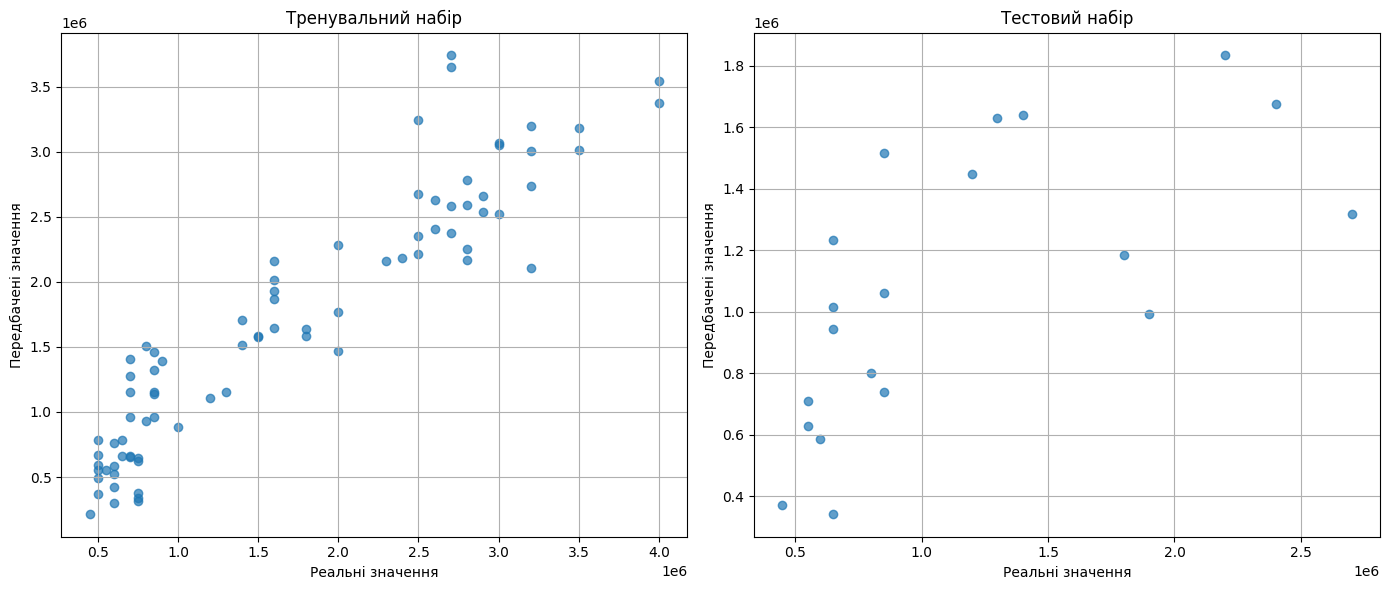

In [16]:
X_train_numeric = X_train.select_dtypes(include=['number']).apply(pd.to_numeric, errors='coerce')
X_test_numeric = X_test.select_dtypes(include=['number']).apply(pd.to_numeric, errors='coerce')

X_train_numeric = X_train_numeric.fillna(X_train_numeric.mean())
X_test_numeric = X_test_numeric.fillna(X_train_numeric.mean())

model = LinearRegression()
model.fit(X_train_numeric, y_train)

y_train_pred = model.predict(X_train_numeric)
y_test_pred = model.predict(X_test_numeric)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f"RMSE для тренувального набору: {rmse_train}")
print(f"RMSE для тестового набору: {rmse_test}")

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, alpha=0.7)
plt.title("Тренувальний набір")
plt.xlabel("Реальні значення")
plt.ylabel("Передбачені значення")
plt.grid()

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, alpha=0.7)
plt.title("Тестовий набір")
plt.xlabel("Реальні значення")
plt.ylabel("Передбачені значення")
plt.grid()

plt.tight_layout()
plt.show()


**Висновки**

Тренувальний набір:

RMSE становить 375,814, що вказує на відносно високу середню похибку моделі. Передбачення моделі досить близькі до реальних значень, але є певні відхилення.
На графіку розсіювання видно, що передбачення розташовані доволі близько до діагональної лінії, але є певний розкид, особливо для значень, які мають вищу ціну.

Тестовий набір:

RMSE для тестового набору ще більше — 509,572. Це вказує на те, що модель узагальнює дані гірше на тестовому наборі, що може бути наслідком:
Невеликого розміру тестової вибірки.
Недостатньо потужної моделі

**Завдання 7**. Ми хочемо проаналізувати як впливає кожен чинник на цілову змінну. Для цього давайте промасштабуємо наші дані.
1. Зробіть масштабування незалежних змінних використовуючи `StandardScaler`. Тренуємо на тренувальних даних, а на тестувальних лише викликаємо `transform`.

2. Натренуйте модель на відмасштабованих даних і перегляньте коефіцієнти моделі. Які колонки є найвпливовішими на формування передбачення з точки зору коефіцієнтів? Проаналізуйте напрям дії найважливіших коефіцієнтів. Чи це логічно з точки зору значення відповідних змінних, що вони впливають на цільову змінну саме в напрямі збільшення / зменшення?

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_numeric)
X_test_scaled = scaler.transform(X_test_numeric)

model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled, y_train)

coefficients = model_scaled.coef_
columns = X_train_numeric.columns
coef_df = pd.DataFrame({'Feature': columns, 'Coefficient': coefficients}).sort_values(by='Coefficient', key=abs, ascending=False)

print("Коефіцієнти моделі:")
print(coef_df)

most_influential_features = coef_df.head(5)
print("\nНайвпливовіші чинники:")
print(most_influential_features)


Коефіцієнти моделі:
              Feature    Coefficient
7               Power  541166.377435
4        Transmission  308618.842985
5             Mileage -162166.962126
3           Fuel_Type -149246.574196
20   Owner_Type_Codes -132277.336153
9          Brand_Audi -105103.023853
2   Kilometers_Driven -103226.415680
16     Brand_Mercedes  -95715.793528
11         Brand_Ford   76713.281992
19   Brand_Volkswagen   75251.607066
8               Seats   56883.630035
0              Car_ID   48501.109306
15       Brand_Maruti   40557.669028
14     Brand_Mahindra  -40528.515433
12        Brand_Honda   37429.531443
18       Brand_Toyota  -25472.171401
10          Brand_BMW   24783.288046
1                Year  -18233.802548
13      Brand_Hyundai  -15634.911302
6              Engine  -11843.398122
17         Brand_Tata    2991.200258

Найвпливовіші чинники:
             Feature    Coefficient
7              Power  541166.377435
4       Transmission  308618.842985
5            Mileage -162166.96212

**Висновки**

Power: Чим потужніший автомобіль, тим вища його ціна — все логічно.

Transmission: Автоматична коробка передач явно додає до вартості.

Mileage: Більший пробіг знижує ціну, адже машина більше зношена.

Fuel_Type: Тип пального також впливає — не всі варіанти цінуються однаково.

Owner_Type_Codes: Чим більше у машини було власників, тим вона дешевша.

**Завдання 8.** На тих самих відмасштабованих даних натренуйте модель з `statsmodels`. Виведіть звіт і проаналізуйте p-value коефіцієнтів. Які ознаки є стат значущими на рівні значущості 0.05? Напишіть їх список.

In [18]:
import statsmodels.api as sm

X_train_scaled_with_const = sm.add_constant(X_train_scaled)

model_stats = sm.OLS(y_train, X_train_scaled_with_const).fit()

print(model_stats.summary())

significant_features = [
    col for col, p_val in zip(['const'] + list(X_train_numeric.columns), model_stats.pvalues)
    if p_val < 0.05
]

print("\nСтатистично значущі ознаки (p-value < 0.05):")
print(significant_features)

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     19.38
Date:                Sat, 25 Jan 2025   Prob (F-statistic):           6.39e-19
Time:                        23:04:31   Log-Likelihood:                -1140.5
No. Observations:                  80   AIC:                             2323.
Df Residuals:                      59   BIC:                             2373.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.68e+06   4.89e+04     34.337      0.0

**Завдання 9**. Натренуйте лінійну регресію з `statsmodels` тільки на ознаках, які виявлись стат. значущими в попередньому завданні. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared?

In [19]:
significant_columns = [col for col in significant_features if col != 'const']
X_train_significant = X_train_scaled[:, [list(X_train_numeric.columns).index(col) for col in significant_columns]]
X_train_significant_with_const = sm.add_constant(X_train_significant)

model_significant = sm.OLS(y_train, X_train_significant_with_const).fit()

print(model_significant.summary())


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     65.82
Date:                Sat, 25 Jan 2025   Prob (F-statistic):           7.64e-26
Time:                        23:10:22   Log-Likelihood:                -1153.6
No. Observations:                  80   AIC:                             2319.
Df Residuals:                      74   BIC:                             2334.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.68e+06   5.15e+04     32.625      0.0

**Висновки**

Отже, після того, як ми прибрали всі незначущі ознаки, модель все одно показала круті результати.

R² залишився майже таким самим (81.6%), тобто нова спрощена модель пояснює варіацію цін машин так само добре, як і попередня. Adjusted R² теж майже не змінився — отже, всі "зайві" ознаки дійсно були зайвими.

Модель тепер використовує тільки 5 найважливіших ознак, і це зробило її простішою та зрозумілішою. Загальна якість моделі не погіршилась, тож виключення "слабких" ознак було правильним рішенням.

Коротше кажучи, тепер модель працює ефективніше, а результат залишився стабільно добрим.









**Завдання 10**. Натренуйте лінійну регресію з `statsmodels` на усіх ознаках з масштабованого `X_train`, у яких p_value в завданні 7 менше за `0.25`. Ми таким чином помʼякшили критерій відбору ознак. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared порівняно з завданням 7? Яку модель з останніх 3х завдань ви б лишили для використання?

In [20]:
columns_with_pval = [col for col, p_val in zip(['const'] + list(X_train_numeric.columns), model_stats.pvalues) if p_val < 0.25]
columns_with_pval = [col for col in columns_with_pval if col != 'const']  # виключаємо константу

X_train_pval = X_train_scaled[:, [list(X_train_numeric.columns).index(col) for col in columns_with_pval]]
X_train_pval_with_const = sm.add_constant(X_train_pval)

model_pval = sm.OLS(y_train, X_train_pval_with_const).fit()

print(model_pval.summary())


                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     44.95
Date:                Sat, 25 Jan 2025   Prob (F-statistic):           1.28e-25
Time:                        23:14:20   Log-Likelihood:                -1144.9
No. Observations:                  80   AIC:                             2310.
Df Residuals:                      70   BIC:                             2334.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.68e+06   4.75e+04     35.396      0.0

**Висновки**

Модель із цього завдання показала найкращі результати: R² = 0.852, Adj. R² = 0.834, що вище, ніж у попередніх моделях. Вибір більше ознак покращив результати моделі, і більшість із них виявились важливими. Рекомендую залишити цю модель для використання, адже вона забезпечує оптимальний баланс між якістю та складністю.